<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Hyperparameter%20Tuning%20in%20Python/4%20Informed%20Search/4%20Informed%20Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informed Search

In this final chapter you will be given a taste of more advanced hyperparameter tuning methodologies known as ''informed search''. This includes a methodology known as Coarse To Fine as well as Bayesian & Genetic hyperparameter tuning algorithms. You will learn how informed search differs from uninformed search and gain practical skills with each of the mentioned methodologies, comparing and contrasting them as you go.

# Informed Search: Coarse to Fine

1. Informed Search: Coarse to Fine
In this final chapter, we will look at a group of hyperparameter tuning techniques known as informed search. We will begin with a basic informed search methodology, Coarse to Fine.

2. Informed vs Uninformed Search
So far, everything we have done with grid and random search were instances of uninformed search. When performing uninformed search, each iteration of hyperparameter tuning (each model) does not learn from the previous iterations. This allows us to undertake hyperparameter tuning in parallel. However, doing so much work before being able to learn and iterate seems a bit inefficient, doesn't it?

3. Informed vs Uninformed
Let's make it more explicit. So far, we have been creating all the models at once and collating their scores before deciding the best at the end. An alternate approach would be to build models sequentially, learning from each iteration. This is what undertaking hyperparameter searching in an informed way allows us to do.

4. Coarse to Fine Tuning
A first, basic, informed search methodology is known as 'Coarse to Fine tuning'. The name comes from the fact that you start out with a rough approach and iteratively refine your hyperparameter search. The process goes as follows. First, undertake a random search. Second, review results to see promising areas in your hyperparameter search space. Then, undertake a grid search in the smaller area. Continue this process until an optimal score is obtained or the area becomes too small (meaning not many hyperparameter values) to properly search. You could also substitute step 3 with further random searches before the grid search.

5. Why Coarse to Fine?
Coarse to Fine tuning optimizes the advantages of grid and random search. It uses the advantages of both methods. The wide searching abilities of random search and including a grid search for deeper coverage at the relevant time. It therefore better utilizes efforts so you can iterate. If you see one area on the grid is producing poor results, you will undertake your next search elsewhere, saving you effort. Also note that Coarse to fine is not informed on every model, but on batches of models. Still, it is more informed than what we have done so far!

6. Undertaking Coarse to Fine
Let us set up a pretty large hyperparameter search over these following ranges. How many possible hyperparameter combinations are there? If we create the combinations as we did in previous exercises we can see 134,400 possible combinations!

7. Visualizing Coarse to Fine
Rather than running all those models, we can do a random search on just 500 models Let's first visualize just the accuracy column as a density plot. Wow! There were certainly some bad models in there. Good thing we didn't do a huge grid search and waste our time on those! But there are some good models in there, what hyperparameters did they use?

8. Visualizing Coarse to Fine
Here is a snapshot of the top models of the results DataFrame. Hmmmm, that's not very informative about what to do next, is it? Perhaps the min_samples_leaf being 7? But we don't know if there were also bad models with this same value.

9. Visualizing Coarse to Fine
Instead, let's visualize each hyperparameter against the accuracy scores to see if we can see any trends. We will do a simple scatter plot using a results data frame. That's more interesting! See how accuracy tends to be lower when max_depth is below 6 or 7 and above 30?

10. Visualizing coarse to Fine
A similar exercise with the other two hyperparameters finds some interesting insights. The min_samples_leaf being a bit better below 8, and the learn_rate seems worse above 1-point-3. Now we have a plan for our next iteration.

11. The next steps
Let's summarize what we learned from the first grid search. Values of max_depth between 8 and 30, learn_rate of less than 1-point-3 and perhaps min_samples_leaf less than 8 tend to have higher accuracies. You can take this and undertake a more refined grid search or even another random search around these values to improve the model This simple, bivariate graphing was insightful, but using more advanced visualization techniques could also prove useful.

12. Let's practice!
Let's practice undertaking a Coarse to Fine search!

# Visualizing Coarse to Fine

You're going to undertake the first part of a Coarse to Fine search. This involves analyzing the results of an initial random search that took place over a large search space, then deciding what would be the next logical step to make your hyperparameter search finer.

You have available:

 - combinations_list - a list of the possible hyperparameter combinations the random search was undertaken on.
 - results_df - a DataFrame that has each hyperparameter combination and the resulting accuracy of all 500 trials. Each hyperparameter is a column, with the header the hyperparameter name.
 - visualize_hyperparameter() - a function that takes in a column of the DataFrame (as a string) and produces a scatter plot of this column's values compared to the accuracy scores. An example call of the function would be visualize_hyperparameter('accuracy')

In [ ]:
'''
In [1]:
??visualize_hyperparameter
Signature: visualize_hyperparameter(name)
Source:
def visualize_hyperparameter(name):
  plt.clf()
  plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
  plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
  plt.gca().set_ylim([0,100])
  plt.show()
'''

Instructions

1. Confirm (by printing out) the size of the combinations_list, justifying the need to start with a random search.

2. Sort the results_df by accuracy values and print the top 10 rows. Are there clear insights? Beware a small sample size!

3. Confirm (by printing out) which hyperparameters were used in this search. These are the column names in results_df.

4. Call visualize_hyperparameter() with each hyperparameter in turn (max_depth, min_samples_leaf, learn_rate). Are there any trends?

In [ ]:
# Confirm the size of the combinations_list
print(len(combinations_list))

# Sort the results_df by accuracy and print the top 10 rows
print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')
visualize_hyperparameter('learn_rate')

'''
<script.py> output:
   
    10000
       
       max_depth  min_samples_leaf  learn_rate  accuracy
    1          10                14    0.477450        97
    4           6                12    0.771275        97
    2           7                14    0.050067        96
    3           5                12    0.023356        96
    5          13                11    0.290470        96
    6           6                10    0.317181        96
    7          19                10    0.757919        96
    8           2                16    0.931544        96
    9          16                13    0.904832        96
    10         12                13    0.891477        96
    
    Index(['max_depth', 'min_samples_leaf', 'learn_rate', 'accuracy'], dtype='object')
'''

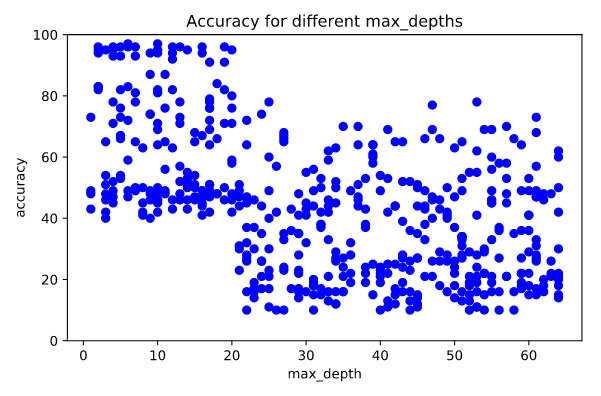

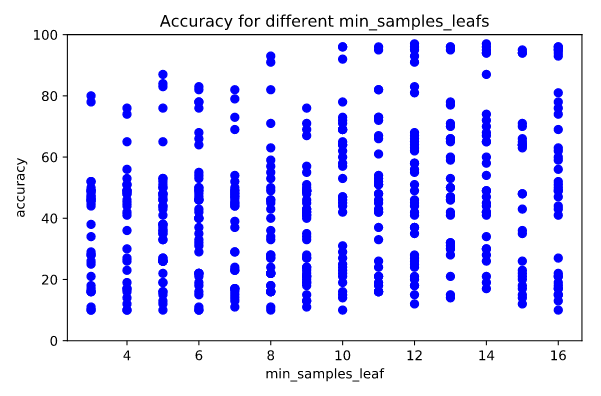

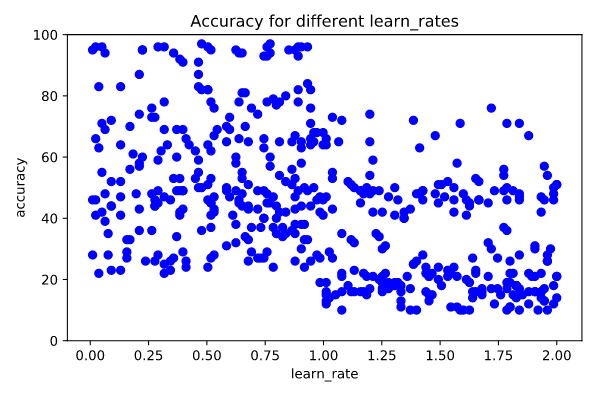

Conclusion

Great stuff! We have undertaken the first step of a Coarse to Fine search. Results clearly seem better when max_depth is below 20. learn_rates smaller than 1 seem to perform well too. There is not a strong trend for min_samples leaf though. Let's use this in the next exercise!

# Coarse to Fine Iterations

You will now visualize the first random search undertaken, construct a tighter grid and check the results. You will have available:

 - results_df - a DataFrame that has the hyperparameter combination and the resulting accuracy of all 500 trials. Only the hyperparameters that had the strongest visualizations from the previous exercise are included (max_depth and learn_rate)
 - `visualize_first()` - This function takes no arguments but will visualize each of your hyperparameters against accuracy for your first random search.



In [ ]:
'''
In [2]:
??visualize_first()
Signature: visualize_first()
Source:
def visualize_first():
  for name in results_df.columns[0:2]:
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    x_line = 20
    if name == "learn_rate":
        x_line = 1
    plt.axvline(x=x_line, color="red", linewidth=4)
    plt.show()
'''

Instructions

1. Use the visualize_first() function to check the values of max_depth and learn_rate that tend to perform better. A convenient red line will be added to make this explicit.

In [ ]:
# Use the provided function to visualize the first results
visualize_first()

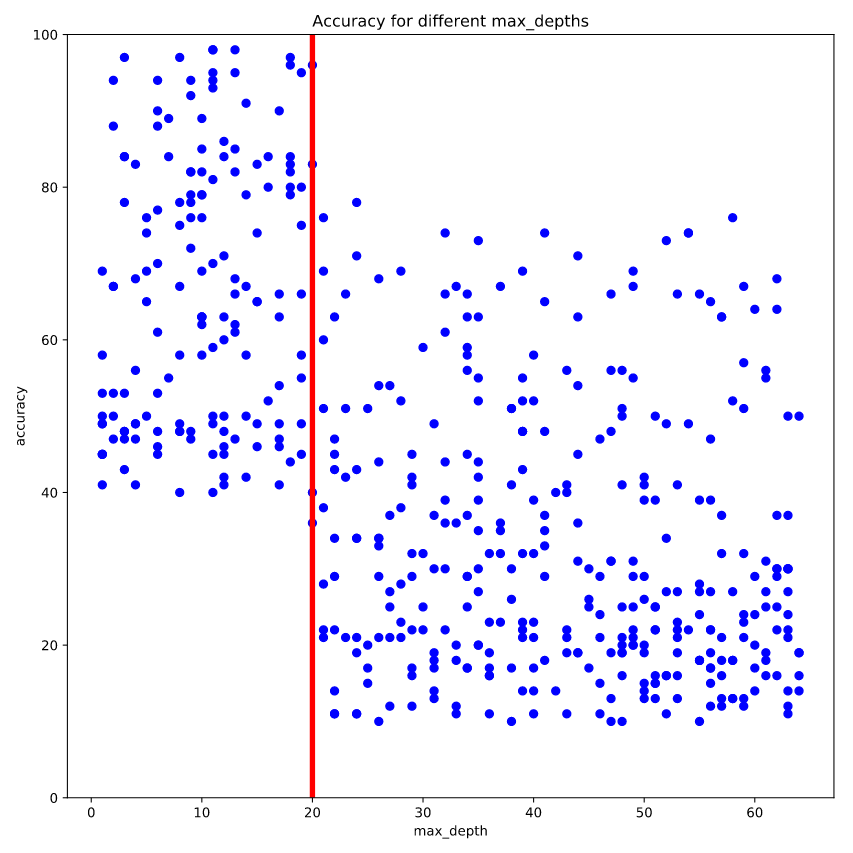

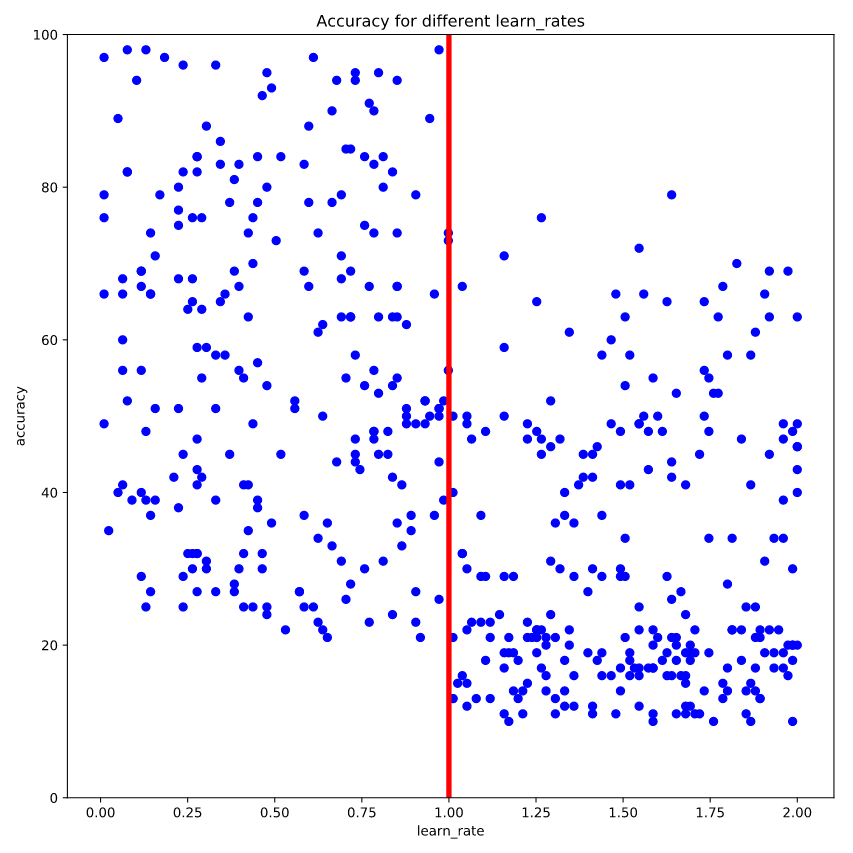

2. Now create a more narrow grid search, testing for max_depth values between 1 and 20 and for 50 learning rates between 0.001 and 1.

In [ ]:
# Use the provided function to visualize the first results
# visualize_first()

# Create some combinations lists & combine
max_depth_list = list(range(1, 21))
learn_rate_list = np.linspace(0.001, 1, 50)

3. We ran the 1,000 model grid search in the background based on those new combinations. Now use the visualize_second() function to visualize the second iteration (grid search) and see if there is any improved results. This function takes no arguments, just run it in-place to generate the plots!

In [ ]:
'''
In [1]:
??visualize_second
Signature: visualize_second()
Source:
def visualize_second():
  for name in results_df2.columns[0:2]:
    plt.clf()
    plt.scatter(results_df2[name],results_df2['accuracy'], c=['blue']*1000)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    plt.show()
'''
# Use the provided function to visualize the first results
# visualize_first()

# Create some combinations lists & combine:
max_depth_list = list(range(1,21))
learn_rate_list = np.linspace(0.001,1,50)

# Call the function to visualize the second results
visualize_second()


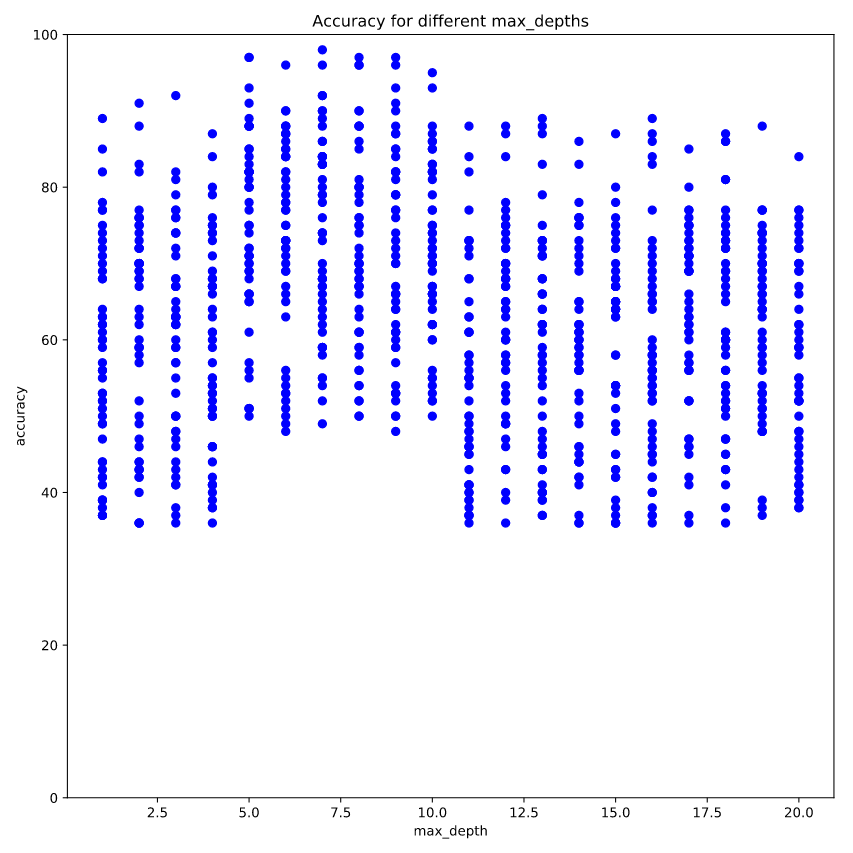

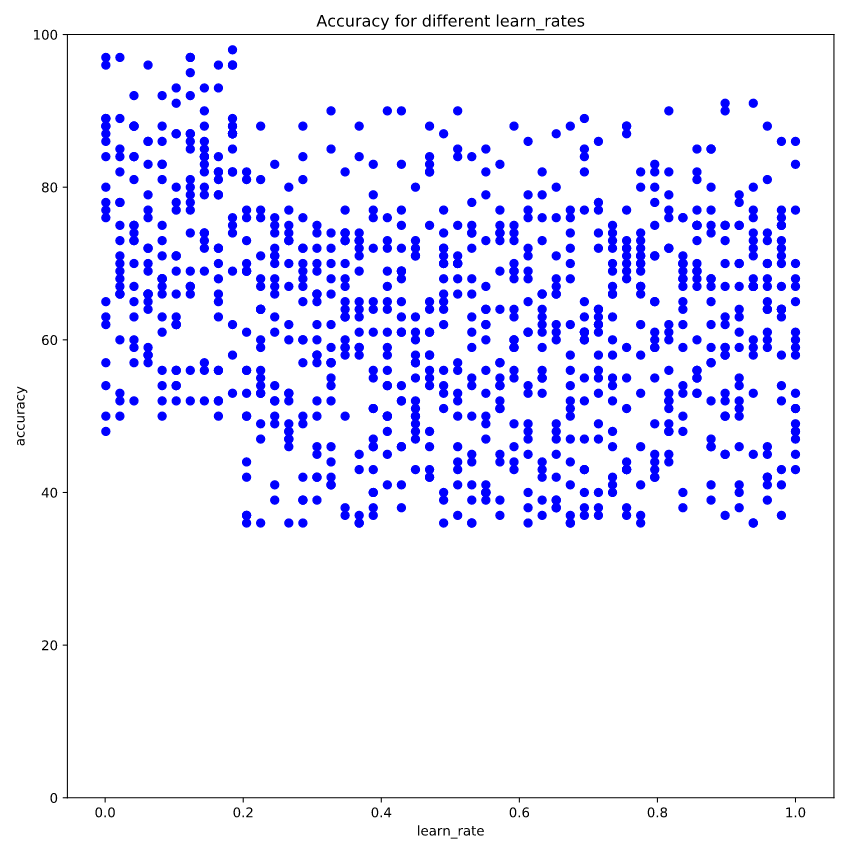

Conclusion

Excellent! You can see in the second example our results are all generally higher. There also appears to be a bump around max_depths between 5 and 10 as well as learn_rate less than 0.2 so perhaps there is even more room for improvement!

# Informed Search: Bayesian Statistics

1. Informed Methods: Bayesian Statistics
Now we will explore an important statistical concept and its application to informed hyperparameter tuning: Bayesian methods.

2. Bayes Introduction
Bayes rule is a famous statistical tool that has been around for 250 years. So how can this be relevant to machine learning today? Well, Bayes rule is actually a method where we can iteratively use new evidence to update our beliefs about an outcome. Intuitively this makes senses as when using informed search we want to learn from evidence to make our hyperparameter tuning better.

3. Bayes Rule
Here is the Bayes Rule formula. The left hand side is the probability of A (which we care about), given that B has occurred, where B is some new (relevant) evidence. This is known as the 'posterior'. The right hand side is how we calculate this. P(A) is known as the 'prior'. It is the initial hypothesis about the event we care about. See how it is different to P(A|B)? The latter is the probability given new evidence.

4. Bayes Rule
P(B) is the 'marginal likelihood' and it is the probability of observing this new evidence. P(B|A) is the 'likelihood' which is the probability of observing the evidence, given the event we care about. This all may be quite confusing, but let's use a common example of a medical diagnosis to demonstrate.

5. Bayes in Medicine
Let's take a medical example to illustrate the Bayesian process. Let's say 5% of people in the general population have a certain disease. This is our P(D). 10% of people are genetically predisposed to this condition. That is, because of their genetics, they are more likely to get this condition. This is our P(Pre). We also know that 20% of people with the disease are predisposed which is our P(Pre|D).

6. Bayes in Medicine
So what is the probability that any given person has the disease? If we know nothing about a person, then the probability of them having the disease is just the prior. However, what if we add some new evidence that this person is predisposed? We can update our beliefs by subbing into Bayes formula. Now we can see that the probability of having the disease, given that someone is predisposed is around 10%, or double the original prior.

7. Bayes in Hyperparameter Tuning
We can apply this logic to hyperparameter tuning using the following process. Pick a hyperparameter combination. Build a model. Get new _evidence_ (the score of the model). Update our beliefs and chose better hyperparameters next round and continue until we are happy with the result. Bayesian hyperparameter tuning is very new but quite popular for larger and more complex hyperparameter tuning tasks.

8. Bayesian Hyperparameter Tuning with Hyperopt
A useful package for Bayesian hyperparameter tuning is Hyperopt. To undertake Bayesian hyperparameter tuning with this package, we first need to set the domain, which is our Grid, with a bit of a twist. Then, we set the optimization algorithm (we will use the default TPE). Finally, we need to set the objective function to minimize: we will use 1-Accuracy because this package tries to minimize not maximize something.

9. Hyperopt: Set the Domain (grid)
There are many options for how to lay out the grid in Bayesian optimization including those mentioned on the slide. Hyperopt does not use point values on the grid but instead each point represents probabilities for each hyperparameter value. To keep it simple, we will use uniform distribution. There are many more distributions if you check the documentation.

10. The Domain
Let's see how to set up our grid or domain in hyperopt. This code demonstrates this using a simple uniform distribution between the min and max values supplied. quniform means uniform but quantized (or binned) by the specified third number.

11. The objective function
We need to define an objective function to run the algorithm. It needs to take in the parameters to test and use those to create an estimator (for us a GBM). The estimator is cross-validated to find the best average score and returns the average loss over the folds. We need to make our loss as one minus the best score since Hyperopt will work to minimize what we return - we don't want to minimize accuracy! I have also written a small function to write out the results at each iteration for analysis later.

12. Run the algorithm
Now we simply need to call the algorithm. We give it the objective function we created, the sample space we set up, how many iterations and an optional random seed to ensure consistency. The algorithm is the standard algorithm and best one currently implemented. This function will only return the best hyperparameters which is why we logged out results at each iteration.

13. Let's practice!
Let's practice Bayesian hyperparameter tuning in python!

# Bayes Rule in Python

In this exercise you will undertake a practical example of setting up Bayes formula, obtaining new evidence and updating your 'beliefs' in order to get a more accurate result. The example will relate to the likelihood that someone will close their account for your online software product.

These are the probabilities we know:

 - 7% (0.07) of people are likely to close their account next month
 - 15% (0.15) of people with accounts are unhappy with your product (you don't know who though!)
 - 35% (0.35) of people who are likely to close their account are unhappy with your product

Instructions

1. Assign the different probabilities (as decimals) to variables. p_unhappy is the likelihood someone is unhappy, p_unhappy_close is the probability that someone is unhappy with the product, given they are going to close their account.

In [ ]:
# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

2. Assign the probability that someone will close their account next month to the variable p_close as a decimal.

In [ ]:
# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

3. You interview one of your customers and discover they are unhappy. What is the probability they will close their account, now that you know this evidence? Assign the result to p_close_unhappy and print it.

In [ ]:
# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

'''
<script.py> output:
    0.16333333333333336
'''

Conclusion

Nice work! You correctly were able to frame this problem in a Bayesian way, and update your beliefs using new evidence. There's a 16.3% chance that a customer, given that they are unhappy, will close their account. Next we'll use a package which uses this methodology to automatically tune hyperparameters for us.

# Bayesian Hyperparameter tuning with Hyperopt

In this example you will set up and run a bayesian hyperparameter optimization process using the package Hyperopt (already imported as hp for you). You will set up the domain (which is similar to setting up the grid for a grid search), then set up the objective function. Finally, you will run the optimizer over 20 iterations.

You will need to set up the domain using values:

 - max_depth using quniform distribution (between 2 and 10, increasing by 2)
 - learning_rate using uniform distribution (0.001 to 0.9)

Note that for the purpose of this exercise, this process was reduced in data sample size and hyperopt & GBM iterations. If you are trying out this method by yourself on your own machine, try a larger search space, more trials, more cvs and a larger dataset size to really see this in action!

Instructions

1. Set up a space dictionary using the domain mentioned above.

2. Set up the objective function using a gradient boosting classifier.

3. Run the algorithm for 20 evaluations (just use the default, suggested algorithm from the slides).

In [ ]:
'''
space = {
'max_depth': hp.quniform('max_depth', 2, 10, 2),
'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 8, 2),
'learning_rate': hp.uniform('learning_rate', 0.01, 1, 55),
}

def objective(params):
params = {'max_depth': int(params['max_depth']),
'min_samples_leaf': int(params['min_samples_leaf']),
'learning_rate': params['learning_rate']}
gbm_clf = GradientBoostingClassifier(n_estimators=500, **params)
best_score = cross_val_score(gbm_clf, X_train, y_train,
scoring='accuracy', cv=10, n_jobs=4).mean()
loss = 1 - best_score
write_results(best_score, params, iteration)
return loss
'''

In [ ]:
# Set up space dictionary with specified hyperparameters
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params) 
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.RandomState(42), algo=tpe.suggest)
print(best)

'''
<script.py> output:
    
  0%|          | 0/20 [00:00<?, ?it/s, best loss: ?]
  5%|5         | 1/20 [00:00<00:03,  5.45it/s, best loss: 0.26759418985474637]
 10%|#         | 2/20 [00:00<00:03,  5.34it/s, best loss: 0.2549063726593165] 
 15%|#5        | 3/20 [00:00<00:03,  5.43it/s, best loss: 0.2549063726593165]
 20%|##        | 4/20 [00:00<00:02,  5.51it/s, best loss: 0.2549063726593165]
 25%|##5       | 5/20 [00:01<00:03,  3.87it/s, best loss: 0.2549063726593165]
 30%|###       | 6/20 [00:01<00:03,  3.99it/s, best loss: 0.2549063726593165]
 35%|###5      | 7/20 [00:01<00:02,  4.36it/s, best loss: 0.2549063726593165]
 40%|####      | 8/20 [00:01<00:02,  4.59it/s, best loss: 0.2549063726593165]
 45%|####5     | 9/20 [00:01<00:02,  4.85it/s, best loss: 0.2549063726593165]
 50%|#####     | 10/20 [00:02<00:01,  5.14it/s, best loss: 0.2549063726593165]
 55%|#####5    | 11/20 [00:02<00:01,  5.07it/s, best loss: 0.2549063726593165]
 60%|######    | 12/20 [00:02<00:01,  4.83it/s, best loss: 0.2549063726593165]
 65%|######5   | 13/20 [00:02<00:01,  4.34it/s, best loss: 0.2549063726593165]
 70%|#######   | 14/20 [00:03<00:02,  2.95it/s, best loss: 0.2525688142203555]
 75%|#######5  | 15/20 [00:03<00:01,  3.45it/s, best loss: 0.2525688142203555]
 80%|########  | 16/20 [00:03<00:01,  3.75it/s, best loss: 0.2525688142203555]
 85%|########5 | 17/20 [00:04<00:01,  2.83it/s, best loss: 0.24246856171404285]
 90%|######### | 18/20 [00:04<00:00,  3.29it/s, best loss: 0.24246856171404285]
 95%|#########5| 19/20 [00:04<00:00,  3.65it/s, best loss: 0.24246856171404285]
100%|##########| 20/20 [00:04<00:00,  4.07it/s, best loss: 0.24246856171404285]
100%|##########| 20/20 [00:04<00:00,  4.04it/s, best loss: 0.24246856171404285]
    {'learning_rate': 0.11310589268581149, 'max_depth': 6.0}
'''

Conclusion

Excellent! You succesfully built your first bayesian hyperparameter tuning algorithm. This will be a very powerful tool for your machine learning modeling in future. Bayesian hyperparameter tuning is a new and popular method so this first taster is a valuable thing to gain experience in. You are highly encouraged to extend this example on your own!

# Informed Search: Genetic Algorithms

1. Informed Methods: Genetic Algorithms
Let's learn about another informed search methodology using genetic hyperparameter tuning.

2. A lesson on genetics
To understand genetic algorithms in machine learning, we should firstly understand how the inspiration for this technology, biological evolution, works. In genetic evolution in the real world, we have the following process. To begin, there are many creatures existing called offspring. The strongest creatures survive the tough environment and pair off. There is some 'crossover' as they form offspring. Random mutations occur with some of the offspring. These mutations sometimes help give some offspring an advantage. Finally, go back to (1)! This is how evolution works in nature.

3. Genetics in Machine Learning
We can apply the same idea to hyperparameter tuning. Firstly we can create some models (that have hyperparameter settings). Second, we can pick the best (by our scoring function). These are the ones that 'survive'. We can then create new models that are similar to the best ones. We add in some randomness so we don't reach a local optimum. Finally we continue this until we are happy!

4. Why does this work well?
This is an informed search that has a number of advantages. It allows us to learn from previous iterations, just like Bayesian hyperparameter tuning. It has the additional advantage of some randomness. This randomness is important because it means we won't just be working on finding similar models and going down a singular path. We have a chance to move to a completely different area of the hyperparameter search space which may be better. Finally, It takes care of many tedious aspects of machine learning like algorithm and hyperparameter choice.

5. Introducing TPOT
A useful library for genetic hyperparameter tuning is TPOT. The documentation on the website explains its vision. It aims to be your Data Science Assistant, automatically optimizing pipelines of models using genetic programming." This is great because pipelines not only include the model (or multiple models) but also work on features and other aspects of the process. Plus it returns the Python code of the pipeline for you!

6. TPOT components
The key arguments to a TPOT classifier are: generations: The number of cycles we undertake of creating offspring models, mutating and crossing over, picking the best and continuing. population_size: In each iteration, this is how many models we keep. The strongest 'offspring'. offspring_size: In each iteration this is the number of offspring (for us, models) that we create. mutation_rate: We apply randomness to a proportion of the pipelines. This hyperparameter sets that proportion (between 0 and 1). crossover_rate: In each iteration we crossover or breed together some of our models to find similar ones. This sets the proportion of pipelines that we do this to. scoring: the objective function to determine the strongest models or offspring for example, accuracy. And finally cv, the cross-validation strategy to use which will be familiar from classic machine learning modeling you have done.

7. A simple example
Here we have a super simple example. You will notice the similarities to they way you have built models with Scikit Learn. Firstly creating the estimator with the hyperparameters. Here the TPOTClassifier is the estimator. Then using the dot-fit method and a scoring method, just like in Scikit Learn. We will keep default values for mutation_rate and crossover_rate as they are best left to the default without deeper knowledge on genetic programming. The verbosity parameter will print out the process as it goes. Notice how we are not even selecting algorithms or hyperparameters? TPOT does it all!

8. Let's practice!
Lets practice building our own genetic hyperparameter optimizer with TPOT!

# Genetic Hyperparameter Tuning with TPOT

You're going to undertake a simple example of genetic hyperparameter tuning. TPOT is a very powerful library that has a lot of features. You're just scratching the surface in this lesson, but you are highly encouraged to explore in your own time.

This is a very small example. In real life, TPOT is designed to be run for many hours to find the best model. You would have a much larger population and offspring size as well as hundreds more generations to find a good model.

You will create the estimator, fit the estimator to the training data and then score this on the test data.

For this example we wish to use:

 - 3 generations
 - 4 in the population size
 - 3 offspring in each generation
 - accuracy for scoring

A random_state of 2 has been set for consistency of results.

Instructions

1. Assign the values outlined in the context to the inputs for tpot_clf.

2. Create the tpot_clf classifier with the correct inputs.

3. Fit the classifier to the training data (X_train & y_train are available in your workspace).

4. Use the fitted classifier to score on the test set (X_test & y_test are available in your workspace).

In [ ]:
# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

'''
<script.py> output:
    Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
    Generation 1 - Current best internal CV score: 0.7575064376609415
    Generation 2 - Current best internal CV score: 0.7750693767344183
    Generation 3 - Current best internal CV score: 0.7750693767344183
    
    Best pipeline: BernoulliNB(input_matrix, alpha=0.1, fit_prior=True)
    0.76
'''

Conclusion

Nice work! You can see in the output the score produced by the chosen model (in this case a version of Naive Bayes) over each generation, and then the final accuracy score with the hyperparameters chosen for the final model. This is a great first example of using TPOT for automated hyperparameter tuning. You can now extend on this on your own and build great machine learning models!

# Analysing TPOT's stability

You will now see the random nature of TPOT by constructing the classifier with different random states and seeing what model is found to be best by the algorithm. This assists to see that TPOT is quite unstable when not run for a reasonable amount of time.

Instructions

1. Create the TPOT classifier, fit to the data and score using a random_state of 42.

2. Now try using a random_state of 122. The numbers don't mean anything special, but should produce different results.

3. Finally try using the random_state of 99. See how there is a different result again?

In [ ]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

'''
<script.py> output:
    Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
    Generation 1 - Current best internal CV score: 0.7549688742218555
    Generation 2 - Current best internal CV score: 0.7549688742218555
    
    Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=7, min_samples_leaf=11, min_samples_split=12)
    0.75
'''

# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=122)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

'''
<script.py> output:
    Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
    Generation 1 - Current best internal CV score: 0.7675066876671917
    Generation 2 - Current best internal CV score: 0.7675066876671917
    
    Best pipeline: KNeighborsClassifier(MaxAbsScaler(input_matrix), n_neighbors=57, p=1, weights=distance)
    0.75
'''

# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=99)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

'''
<script.py> output:
    Warning: xgboost.XGBClassifier is not available and will not be used by TPOT.
    Generation 1 - Current best internal CV score: 0.8075326883172079
    Generation 2 - Current best internal CV score: 0.8075326883172079
    
    Best pipeline: RandomForestClassifier(SelectFwe(input_matrix, alpha=0.033), bootstrap=False, criterion=gini, max_features=1.0, min_samples_leaf=19, min_samples_split=10, n_estimators=100)
    0.78
'''

Conclusion

Well done! You can see that TPOT is quite unstable when only running with low generations, population size and offspring. The first model chosen was a Decision Tree, then a K-nearest Neighbor model and finally a Random Forest. Increasing the generations, population size and offspring and running this for a long time will assist to produce better models and more stable results. Don't hesitate to try it yourself on your own machine!

# Congratulations!

1. Wrap up
Well done on reaching the end of the course! Let's summarize all your learnings.

2. Hyperparameters vs Parameters
You firstly learned the difference between hyperparameters and parameters. Remember that hyperparameters are inputs to the estimator or algorithm that you set, they are not learned by the algorithm in the modeling process. Parameters are learned by the algorithm and returned to you. You do not set these.

3. Which hyperparameters & values?
A few times during the course you explored best practice for setting hyperparameters and their values to search over. You learned some top tips like: Which hyperparameters are better to start with than others,for example with a Random Forest use case. That there are potentially silly values you can set for hyperparameters that will waste your effort. You need to beware of conflicting hyperparameter values, especially when the error may not be obvious and finally that this best practice is specific to each algorithm and hyperparameter. So you have some work to do researching and learning this!

4. Remembering Grid Search
We then learned about grid search. This is where we construct a grid of all the values we wish to test for all the different hyperparameters Then we undertake an exhaustive search of all the different combinations and finally pick the best model. You learned that this is a computationally expensive method but it is guaranteed to find the best model in the grid you specify. You can remember being reminded often the importance of setting good grid values!

5. Remembering Random Search
Our next method was random search. This was very similar to grid search The main difference was instead of trying every square (or hyperparameter combination) on the grid, we randomly selected a certain number. This method is more efficient at finding a reasonably good model faster but it is not guaranteed to find the best on your grid.

6. From uninformed to informed search
Finally we looked at some advanced methods that are known as 'informed search'. This is where each iteration learns from the last, as opposed to grid and random where you do all your modeling at once and then pick the best. These methods were: 'Coarse to Fine' where you iteratively build random searches to narrow your search space before a final grid search. An introduction to Bayesian hyperparameter tuning where you use the method of updating your prior beliefs when new evidence arrives about model performance. And finally genetic algorithms, drawing from nature and how evolution selects the best species as you select your best models over the generations.

7. Thank you!
Thanks for taking this course. I hope you learned some useful methodologies for your future work undertaking hyperparameter tuning in Python!